In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
census = pd.read_csv('Census.csv')

In [3]:
census.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


Turn values that include -9 to categorical and then back to numerical using label encoder

In [4]:
census['Family Composition'] = census['Family Composition'].replace([1,2,3,4,5,6,-9], ['Not in a family', 'Married/same-sex civil partnership couple family', 'Cohabiting couple family', 'Lone parent family(male head)', 'Lone parent family(female head)', 'Other related family', 'No code required'])
print(census['Family Composition'].value_counts())
census['Country of Birth'] = census['Country of Birth'].replace([1, 2, -9], ['UK', 'Non UK', 'No Code Required'])
print(census['Country of Birth'].value_counts())
census['Health'] = census['Health'].replace([1, 2, 3, 4, 5, -9], ['Very good health', 'Good health', 'Fair health', 'Bad health', 'Very bad health', 'No code required'])
print(census['Health'].value_counts())
census['Ethnic Group'] = census['Ethnic Group'].replace([1, 2, 3, 4, 5, -9], ['White', 'Mixed', 'Asian and Asian British', 'Black or Black British', 'Chinese or Other ethnic group', 'Not resident in England or Wales, students or schoolchildren living away during term-time'])
print(census['Ethnic Group'].value_counts())
census['Religion'] = census['Religion'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -9], ['No religion', 'Christian', 'Buddhist', 'Hindu', 'Jewish',  'Muslim', 'Sikh', 'Other religion', 'Not stated', 'No code required'])
print(census['Religion'].value_counts())
census['Economic Activity'] = census['Economic Activity'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -9], ['Economically active: Employee', 'Economically active: Self-employed', 'Economically active: Unemployed', 'Economically active: Full-time student', 'Economically inactive: Retired',  'Economically inactive: Student', 'Economically inactive: Looking after home or family', 'Economically inactive: Long-term sick or disabled', 'Economically inactive: Other', 'No code required'])
print(census['Economic Activity'].value_counts())
census['Occupation'] = census['Occupation'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -9], ['Managers, Directors and Senior Officials', 'Professional Occupations', 'Associate Professional and Technical Occupations', 'Administrative and Secretarial Occupations', 'Skilled Trades Occupations',  'Caring, Leisure and Other Service Occupations', 'Sales and Customer Service Occupations', 'Process, Plant and Machine Operatives', 'Elementary Occupations', 'No code required'])
print(census['Occupation'].value_counts())
census['Industry'] = census['Industry'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -9], ['Agriculture, forestry and fishing', 'Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply', 'Construction', 'Wholesale and retail trade; Repair of motor vehicles and motorcycles', 'Accommodation and food service activities',  'Transport and storage; Information and communication', 'Financial and insurance activities; Intermediation', 'Real estate activities; Professional, scientific and technical activities; Administrative and support service activities', 'Public administration and defence; compulsory social security', 'Education', 'Human health and social work activities', 'Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies', 'No code required'])
print(census['Industry'].value_counts())
census['Hours worked per week'] = census['Hours worked per week'].replace([1, 2, 3, 4, -9], ['Part-time: 15 or less hours worked', 'Part-time: 16 to 30 hours worked', 'Full-time: 31 to 48 hours worked', 'Full-time: 49 or more hours worked', 'No code required'])
print(census['Hours worked per week'].value_counts())
census['Approximated Social Grade'] = census['Approximated Social Grade'].replace([1, 2, 3, 4, -9], ['AB', 'C1', 'C2', 'DE', 'No code required'])
print(census['Approximated Social Grade'].value_counts())

Married/same-sex civil partnership couple family    300961
Not in a family                                      96690
Cohabiting couple family                             72641
Lone parent family(female head)                      64519
No code required                                     18851
Lone parent family(male head)                         9848
Other related family                                  6230
Name: Family Composition, dtype: int64
UK                  485645
Non UK               77291
No Code Required      6804
Name: Country of Birth, dtype: int64
Very good health    264971
Good health         191743
Fair health          74480
Bad health           24558
Very bad health       7184
No code required      6804
Name: Health, dtype: int64
White                                                                                        483477
Asian and Asian British                                                                       42711
Black or Black British                   

Turn nominal data to numeric

In [5]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
census['Region'] = LE.fit_transform(census['Region'])
census['Residence Type'] = LE.fit_transform(census['Residence Type'])
census['Family Composition'] = LE.fit_transform(census['Family Composition'])
census['Country of Birth'] = LE.fit_transform(census['Country of Birth'])
census['Health'] = LE.fit_transform(census['Health'])
census['Ethnic Group'] = LE.fit_transform(census['Ethnic Group'])
census['Religion'] = LE.fit_transform(census['Religion'])
census['Economic Activity'] = LE.fit_transform(census['Economic Activity'])
census['Occupation'] = LE.fit_transform(census['Occupation'])
census['Industry'] = LE.fit_transform(census['Industry'])
census['Hours worked per week'] = LE.fit_transform(census['Hours worked per week'])
census['Approximated Social Grade'] = LE.fit_transform(census['Approximated Social Grade'])

In [6]:
census.dtypes

Person ID                      int64
Region                         int64
Residence Type                 int64
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object

In [7]:
census.isnull().sum()

Person ID                         0
Region                            0
Residence Type                    0
Family Composition                0
Population Base                   0
Sex                               0
Age                               0
Marital Status                    0
Student                           0
Country of Birth                  0
Health                            0
Ethnic Group                      0
Religion                          0
Economic Activity                 0
Occupation                        0
Industry                          0
Hours worked per week             0
No of hours                  302321
Approximated Social Grade         0
dtype: int64

In [8]:
census['No of hours'].fillna(method='bfill', inplace=True)

In [9]:
census.isnull().sum()

Person ID                    0
Region                       0
Residence Type               0
Family Composition           0
Population Base              0
Sex                          0
Age                          0
Marital Status               0
Student                      0
Country of Birth             0
Health                       0
Ethnic Group                 0
Religion                     0
Economic Activity            0
Occupation                   0
Industry                     0
Hours worked per week        0
No of hours                  0
Approximated Social Grade    0
dtype: int64

In [10]:
census.shape

(569740, 19)

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
census[['Person ID','Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours']] = min_max_scaler.fit_transform(census[['Person ID', 'Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours']])

In [12]:
pearsoncorr=census.corr(method='pearson')
sorted_corr = pearsoncorr.sort_values(by='Approximated Social Grade', axis=0, ascending=False)
sorted_corr

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
Approximated Social Grade,-0.005249,-0.037341,-0.189946,-0.099373,0.162042,-0.004478,-0.401062,-0.190222,-0.432101,-0.031805,0.077899,-0.062044,0.045397,0.533951,0.124824,0.009179,0.236795,-0.427747,1.000000
Economic Activity,0.003910,-0.005742,-0.062953,0.003583,0.115449,0.039203,-0.210356,-0.105486,-0.565298,-0.008747,0.022929,-0.059542,0.002262,1.000000,0.075616,-0.009605,0.317614,-0.802477,0.533951
Hours worked per week,-0.006686,-0.006154,-0.037063,-0.000761,0.030728,0.206667,-0.007795,0.017295,-0.194884,0.000061,-0.056987,-0.031332,-0.027168,0.317614,-0.031509,-0.022331,1.000000,-0.601147,0.236795
Population Base,0.009318,0.015484,-0.066833,0.093217,1.000000,-0.003257,-0.093765,-0.075922,-0.173726,-0.435868,0.005569,-0.072964,0.067585,0.115449,0.012775,-0.003044,0.030728,-0.075590,0.162042
Occupation,-0.004229,-0.010629,-0.004897,-0.008157,0.012775,-0.200279,-0.057064,-0.054370,-0.074034,-0.018537,0.014877,-0.028082,0.027355,0.075616,1.000000,-0.010563,-0.031509,-0.010466,0.124824
Health,0.010184,0.026581,0.038233,-0.143930,0.005569,-0.032204,-0.471759,-0.319181,-0.286053,0.002325,1.000000,-0.043605,0.065848,0.022929,0.014877,0.004486,-0.056987,0.088028,0.077899
Religion,0.021569,0.054679,-0.009692,-0.068804,0.067585,-0.067772,-0.207592,-0.143106,-0.088733,-0.050284,0.065848,-0.100212,1.000000,0.002262,0.027355,0.016613,-0.027168,0.020661,0.045397
Industry,0.004131,0.006840,0.005775,-0.006027,-0.003044,-0.037275,-0.016660,-0.016098,-0.004358,0.014365,0.004486,-0.012986,0.016613,-0.009605,-0.010563,1.000000,-0.022331,0.007196,0.009179
Sex,0.000713,-0.000065,0.000245,-0.034326,-0.003257,1.000000,0.042331,0.129012,0.017002,-0.003508,-0.032204,0.007990,-0.067772,0.039203,-0.200279,-0.037275,0.206667,-0.156448,-0.004478
Person ID,1.000000,0.108667,0.011954,0.013226,0.009318,0.000713,-0.042578,-0.035477,-0.021902,-0.121653,0.010184,-0.184456,0.021569,0.003910,-0.004229,0.004131,-0.006686,-0.002718,-0.005249


In [13]:
del census['Population Base']
del census['Country of Birth']
del census['Ethnic Group']
del census['Residence Type']
del census['Sex']
del census['Marital Status']
del census['Religion']
del census['Health']
del census['Family Composition']
del census['Person ID']
del census['No of hours']
del census['Region']

check for class imbalance in the target class

In [14]:
census['Approximated Social Grade'].value_counts()

1    159642
4    124103
3    123739
0     82320
2     79936
Name: Approximated Social Grade, dtype: int64

Note: Huge difference with and without normalisation

In [15]:
census.columns

Index(['Age', 'Student', 'Economic Activity', 'Occupation', 'Industry',
       'Hours worked per week', 'Approximated Social Grade'],
      dtype='object')

In [16]:
censusSample = census.sample(frac=0.1, replace=False, random_state=0)
X = censusSample.iloc[:,:-1].values    # predictor attributes
y = censusSample.iloc[:,-1].values     # target attributes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Check for which number of k the knn algorithm works best

In [17]:
k_range = range(1, 11)
scores = []
for k in k_range:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.7396798652064027, 0.7353271552934569, 0.7552653748946925, 0.7702190395956192, 0.7771693344566133, 0.780960404380792, 0.7797669194046616, 0.778784049424319, 0.7824347093513058, 0.784400449311991]


Text(0, 0.5, 'Accuracy')

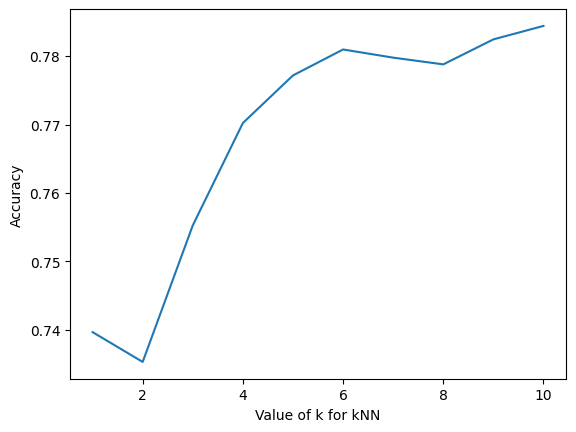

In [18]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy')

Optimal K =10

create lists of models and their metrics in order to compare at the end

In [19]:
models = []
Accuracy_score = []
precision = []
recall = []
f1Score = []

KNN with partitioning

In [20]:
KnnP = KNeighborsClassifier(n_neighbors=4)
KnnP.fit(X_train, y_train)
y_pred = KnnP.predict(X_test)
print(confusion_matrix(y_test, y_pred), '\n')
AccuracyKnnp = accuracy_score(y_test, y_pred)
PrecisionKnnp = precision_score(y_test, y_pred, average='weighted')
RecallKnnp = recall_score(y_test, y_pred, average='weighted')
F1ScoreKnnp = f1_score(y_test, y_pred, average='weighted')
models.append('KNNPartitioning')
Accuracy_score.append(AccuracyKnnp)
precision.append(PrecisionKnnp)
recall.append(RecallKnnp)
f1Score.append(F1ScoreKnnp)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')
print(classification_report(y_test, y_pred))
print("Accuracy:", AccuracyKnnp)

[[1693  295   31  107    0]
 [ 701 2875  100  246    9]
 [  71  131 1338  407    5]
 [ 132  201  513 2231   29]
 [  26  156   28   85 2834]] 

Mean Absolute Error: 0.332841898343162
Mean Squared Error: 0.6066413928671721
Root Mean Squared Error: 0.7788718719193627 

              precision    recall  f1-score   support

           0       0.65      0.80      0.71      2126
           1       0.79      0.73      0.76      3931
           2       0.67      0.69      0.68      1952
           3       0.73      0.72      0.72      3106
           4       0.99      0.91      0.94      3129

    accuracy                           0.77     14244
   macro avg       0.76      0.77      0.76     14244
weighted avg       0.78      0.77      0.77     14244

Accuracy: 0.7702190395956192


Knn with cross validation

[0.77384818 0.76761738 0.76480913 0.76428258 0.76320871]
Accuracy: 0.77 (+/- 0.01)
Mean Absolute Error: 0.3382946607224348
Mean Squared Error: 0.6185979569628252
Root Mean Squared Error: 0.786509985291239 

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      8436
           1       0.77      0.76      0.77     15758
           2       0.63      0.66      0.65      8007
           3       0.72      0.69      0.71     12369
           4       0.99      0.91      0.95     12404

    accuracy                           0.77     56974
   macro avg       0.76      0.76      0.76     56974
weighted avg       0.77      0.77      0.77     56974

Accuracy: 0.7667532558710991


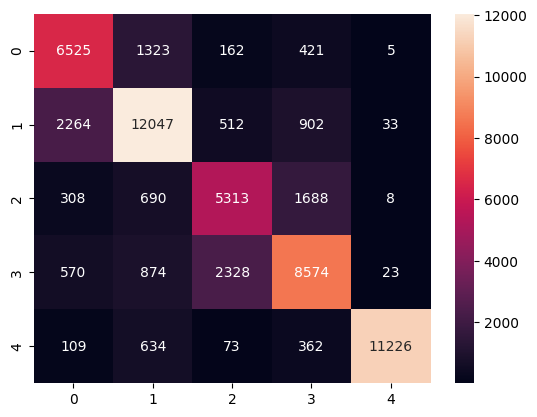

In [21]:
KnnC = KNeighborsClassifier(n_neighbors=4)
CvScore = cross_val_score(KnnC, X, y, cv=5)
print(CvScore)
print("Accuracy: %0.2f (+/- %0.2f)" % (CvScore.mean(), CvScore.std()*2))
y_pred = cross_val_predict(KnnC, X, y, cv=5)
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d'), '\n'
AccuracyKnncv = accuracy_score(y, y_pred)
PrecisionKnncv = precision_score(y, y_pred, average='weighted')
RecallKnncv = recall_score(y, y_pred, average='weighted')
F1ScoreKnncv = f1_score(y, y_pred, average='weighted')
models.append('KNNCrossValidation')
Accuracy_score.append(AccuracyKnncv)
precision.append(PrecisionKnncv)
recall.append(RecallKnncv)
f1Score.append(F1ScoreKnncv)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))

Neural Network partition

In [22]:
MLPP = MLPClassifier(max_iter = 1000, random_state=0)
MLPP.fit(X_train,y_train)
y_pred = MLPP.predict(X_test)
print(confusion_matrix(y_test, y_pred), '\n')
AccuracyMLPp = accuracy_score(y_test, y_pred)
PrecisionMLPp = precision_score(y_test, y_pred, average='weighted')
RecallMLPp = recall_score(y_test, y_pred, average='weighted')
F1ScoreMLPp = f1_score(y_test, y_pred, average='weighted')
models.append('MLPPartitioning')
Accuracy_score.append(AccuracyMLPp)
precision.append(PrecisionMLPp)
recall.append(RecallMLPp)
f1Score.append(F1ScoreMLPp)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[1574  433   15  104    0]
 [ 426 3113   82  304    6]
 [  33  112 1196  611    0]
 [  32  131  267 2676    0]
 [  24  157   15  112 2821]] 

Mean Absolute Error: 0.2830665543386689
Mean Squared Error: 0.4991575400168492
Root Mean Squared Error: 0.706510820877394 

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      2126
           1       0.79      0.79      0.79      3931
           2       0.76      0.61      0.68      1952
           3       0.70      0.86      0.77      3106
           4       1.00      0.90      0.95      3129

    accuracy                           0.80     14244
   macro avg       0.80      0.78      0.79     14244
weighted avg       0.81      0.80      0.80     14244

Accuracy: 0.7989328840213423


Neural Network cross-validation

[0.79903466 0.80043879 0.79534884 0.79368144 0.79998245]
Accuracy: 0.80 (+/- 0.01)
Mean Absolute Error: 0.2838312212588198
Mean Squared Error: 0.49915751044336015
Root Mean Squared Error: 0.7065107999481396 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      8436
           1       0.79      0.80      0.79     15758
           2       0.75      0.62      0.68      8007
           3       0.70      0.84      0.76     12369
           4       1.00      0.90      0.95     12404

    accuracy                           0.80     56974
   macro avg       0.80      0.78      0.79     56974
weighted avg       0.81      0.80      0.80     56974

Accuracy: 0.797697195211851


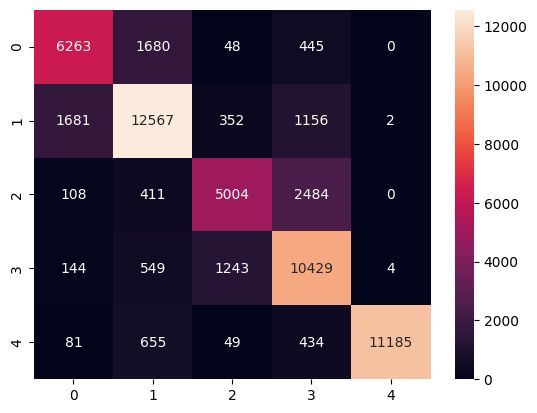

In [23]:
MLPC = MLPClassifier(max_iter = 1000, random_state=0)
MLPCvScore = cross_val_score(MLPC, X, y, cv=5)
print(MLPCvScore)
print("Accuracy: %0.2f (+/- %0.2f)" % (MLPCvScore.mean(), MLPCvScore.std()*2))
y_pred = cross_val_predict(MLPC, X, y, cv=5)
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d'), '\n'
AccuracyMLPcv = accuracy_score(y, y_pred)
PrecisionMLPcv = precision_score(y, y_pred, average='weighted')
RecallMLPcv = recall_score(y, y_pred, average='weighted')
F1ScoreMLPcv = f1_score(y, y_pred, average='weighted')
models.append('MLPCrossValidation')
Accuracy_score.append(AccuracyMLPcv)
precision.append(PrecisionMLPcv)
recall.append(RecallMLPcv)
f1Score.append(F1ScoreMLPcv)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))

SVM partitioniing

try using a linear kernel and if it doesn't classify accurately try using poly kenrel and see if the accuracy increases

In [24]:
SvmP = SVC(kernel = 'linear')
SvmP.fit(X_train, y_train)
y_pred = SvmP.predict(X_test)
print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 949  281  213  683    0]
 [ 397 2316  116  617  485]
 [ 195  525  719  513    0]
 [ 280  858  181 1786    1]
 [  14   74   14  112 2915]] 

Mean Absolute Error: 0.7401010951979781
Mean Squared Error: 1.659365346812693
Root Mean Squared Error: 1.2881635559247486 

              precision    recall  f1-score   support

           0       0.52      0.45      0.48      2126
           1       0.57      0.59      0.58      3931
           2       0.58      0.37      0.45      1952
           3       0.48      0.58      0.52      3106
           4       0.86      0.93      0.89      3129

    accuracy                           0.61     14244
   macro avg       0.60      0.58      0.59     14244
weighted avg       0.61      0.61      0.60     14244

Accuracy: 0.6097304128053918


low accuracy so now will try using a poly kenrel to see if it classifies better

In [25]:
SvmP = SVC(kernel = 'poly')
SvmP.fit(X_train, y_train)
y_pred = SvmP.predict(X_test)
print(confusion_matrix(y_test, y_pred), '\n')
AccuracySVMp = accuracy_score(y_test, y_pred)
PrecisionSVMp = precision_score(y_test, y_pred, average='weighted')
RecallSVMp = recall_score(y_test, y_pred, average='weighted')
F1ScoreSVMp = f1_score(y_test, y_pred, average='weighted')
models.append('SVMPartitioning')
Accuracy_score.append(AccuracySVMp)
precision.append(PrecisionSVMp)
recall.append(RecallSVMp)
f1Score.append(F1ScoreSVMp)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[1243  239   17  627    0]
 [ 430 2667   51  783    0]
 [ 241  154  999  558    0]
 [ 399  105  219 2383    0]
 [  16  152   15  124 2822]] 

Mean Absolute Error: 0.5402274641954508
Mean Squared Error: 1.2129317607413648
Root Mean Squared Error: 1.1013318122806426 

              precision    recall  f1-score   support

           0       0.53      0.58      0.56      2126
           1       0.80      0.68      0.74      3931
           2       0.77      0.51      0.61      1952
           3       0.53      0.77      0.63      3106
           4       1.00      0.90      0.95      3129

    accuracy                           0.71     14244
   macro avg       0.73      0.69      0.70     14244
weighted avg       0.74      0.71      0.72     14244

Accuracy: 0.7100533557989329


SVM cross validation

[0.71162791 0.71004827 0.70697674 0.70188679 0.70668773]
Mean Absolute Error: 0.5436690420191667
Mean Squared Error: 1.2200477410748762
Root Mean Squared Error: 1.10455771287646 

              precision    recall  f1-score   support

           0       0.52      0.58      0.55      8436
           1       0.80      0.68      0.74     15758
           2       0.76      0.52      0.62      8007
           3       0.53      0.75      0.62     12369
           4       1.00      0.90      0.95     12404

    accuracy                           0.71     56974
   macro avg       0.72      0.69      0.70     56974
weighted avg       0.74      0.71      0.71     56974

Accuracy: 0.7074455014568048


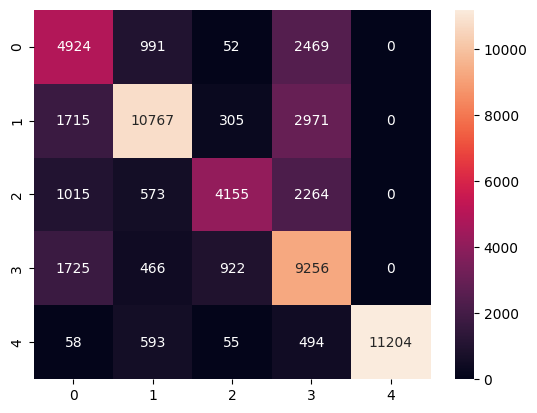

In [26]:
SvmC = SVC(kernel='poly')
SvmCScore = cross_val_score(SvmC, X, y, cv=5)
print(SvmCScore)
y_pred = cross_val_predict(SvmC, X, y, cv=5)
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d'), '\n'
AccuracySVMcv = accuracy_score(y, y_pred)
PrecisionSVMcv = precision_score(y, y_pred, average='weighted')
RecallSVMcv = recall_score(y, y_pred, average='weighted')
F1ScoreSVMcv = f1_score(y, y_pred, average='weighted')
models.append('SVMCrossValidation')
Accuracy_score.append(AccuracySVMcv)
precision.append(PrecisionSVMcv)
recall.append(RecallSVMcv)
f1Score.append(F1ScoreSVMcv)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))

Logistic regression Partitioning

In [27]:
LRP = LogisticRegression(max_iter=200000)
LRP.fit(X_train, y_train)
y_pred = LRP.predict(X_test)
print(confusion_matrix(y_test, y_pred), '\n')
AccuracyLRp = accuracy_score(y_test, y_pred)
PrecisionLRp = precision_score(y_test, y_pred, average='weighted')
RecallLRp = recall_score(y_test, y_pred, average='weighted')
F1ScoreLRp = f1_score(y_test, y_pred, average='weighted')
models.append('LRPartitioning')
Accuracy_score.append(AccuracyLRp)
precision.append(PrecisionLRp)
recall.append(RecallLRp)
f1Score.append(F1ScoreLRp)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 579  536  293  717    1]
 [ 169 2606  115  609  432]
 [ 197  422  695  627   11]
 [ 290  755  137 1893   31]
 [   5   98   17  111 2898]] 

Mean Absolute Error: 0.7404521201909576
Mean Squared Error: 1.6571889918562202
Root Mean Squared Error: 1.2873185277374906 

              precision    recall  f1-score   support

           0       0.47      0.27      0.34      2126
           1       0.59      0.66      0.62      3931
           2       0.55      0.36      0.43      1952
           3       0.48      0.61      0.54      3106
           4       0.86      0.93      0.89      3129

    accuracy                           0.61     14244
   macro avg       0.59      0.57      0.57     14244
weighted avg       0.60      0.61      0.60     14244

Accuracy: 0.6087475428250492


Logistic Regression CrossValidation

[0.61219833 0.61439228 0.61474331 0.61430452 0.61198877]
Mean Absolute Error: 0.7307192754589813
Mean Squared Error: 1.640186751851722
Root Mean Squared Error: 1.2806977597590004 

              precision    recall  f1-score   support

           0       0.46      0.31      0.37      8436
           1       0.59      0.67      0.63     15758
           2       0.61      0.35      0.45      8007
           3       0.48      0.60      0.53     12369
           4       0.86      0.93      0.89     12404

    accuracy                           0.61     56974
   macro avg       0.60      0.57      0.57     56974
weighted avg       0.61      0.61      0.60     56974

Accuracy: 0.6135254677572226


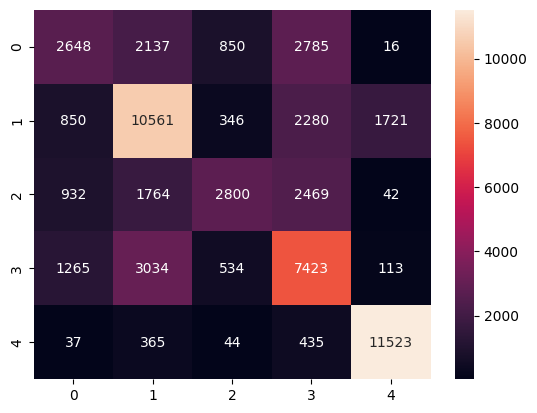

In [28]:
LRPScore = cross_val_score(LRP, X, y, cv=5)
print(LRPScore)
y_pred = cross_val_predict(LRP, X, y, cv=5)
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d'), '\n'
AccuracyLRcv = accuracy_score(y, y_pred)
PrecisionLRcv = precision_score(y, y_pred, average='weighted')
RecallLRcv = recall_score(y, y_pred, average='weighted')
F1ScoreLRcv = f1_score(y, y_pred, average='weighted')
models.append('LRCrossValidation')
Accuracy_score.append(AccuracyLRcv)
precision.append(PrecisionLRcv)
recall.append(RecallLRcv)
f1Score.append(F1ScoreLRcv)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))

Model Comparison

In [29]:
compare_models = pd.DataFrame({ 'Algorithms': models, 'Precision': precision, 'Recall': recall, 'F1 Score': f1Score, 'Accuracy Score': Accuracy_score })
compare_models.sort_values(by = 'Accuracy Score', ascending = False).reset_index(drop=True)

,Algorithms,Precision,Recall,F1 Score,Accuracy Score
0,MLPPartitioning,0.806721,0.798933,0.799453,0.798933
1,MLPCrossValidation,0.805256,0.797697,0.798660,0.797697
2,KNNPartitioning,0.779006,0.770219,0.772774,0.770219
3,KNNCrossValidation,0.774062,0.766753,0.769274,0.766753
4,SVMPartitioning,0.742573,0.710053,0.715983,0.710053
5,SVMCrossValidation,0.738885,0.707446,0.713860,0.707446
6,LRCrossValidation,0.609680,0.613525,0.602104,0.613525
7,LRPartitioning,0.601340,0.608748,0.595716,0.608748
